# Linear regression

$$
Y = X \beta + \epsilon, \epsilon \sim  N(0, \Sigma)
$$

* GLS : generalized least squares for arbitrary covariance $\Sigma$

* OLS : ordinary least squares for i.i.d. errors $\Sigma = I$

* WLS : weighted least squares for heteroskedastic errors $diag(\Sigma)$

* GLSAR : feasible generalized least squares with autocorrelated AR(p) errors $\Sigma = \Sigma(\rho)$

## Ordinary Least Squares

### OLS Estimation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(9876789)


In [2]:
# Artificial data:
nsample = 100
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

X = sm.add_constant(X)
y = np.dot(X, beta) + e


In [3]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Thu, 13 Jul 2023   Prob (F-statistic):          2.83e-239
Time:                        09:29:19   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [4]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)


Parameters:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871


## OLS non-linear curve but linear in parameters

In [5]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)


In [6]:
res = sm.OLS(y, X).fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           6.30e-27
Time:                        09:31:11   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [7]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())


Parameters:  [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors:  [0.02640602 0.10380518 0.00231847 0.17121765]
Predicted values:  [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


In [10]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

pred_ols.summary_frame().head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.770725,0.209449,4.349127,5.192324,3.675201,5.866249
1,5.222135,0.188855,4.841989,5.602280,4.141886,6.302384
2,5.636208,0.178247,5.277414,5.995001,4.563287,6.709129
3,5.986588,0.172575,5.639212,6.333964,4.917431,7.055746
4,6.256432,0.164839,5.924629,6.588235,5.192233,7.320632


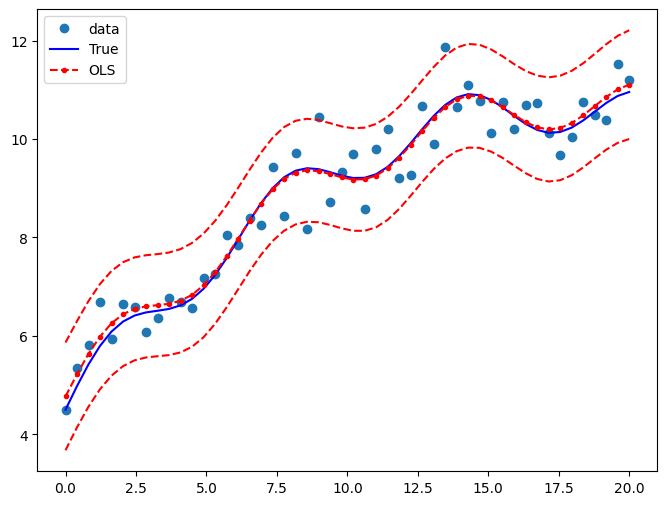

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc="best")


## OLS with dummy variables

In [12]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
# dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = pd.get_dummies(groups).values
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:, 1:]))
X = sm.add_constant(X, prepend=False)

beta = [1.0, 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e


In [13]:
print(X[:5, :])
print(y[:5])
print(groups)
print(dummy[:5, :])


[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[ 9.28223335 10.50481865 11.84389206 10.38508408 12.37941998]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]


In [14]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     671.7
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           5.69e-38
Time:                        09:39:51   Log-Likelihood:                -64.643
No. Observations:                  50   AIC:                             137.3
Df Residuals:                      46   BIC:                             144.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9999      0.060     16.689      0.0

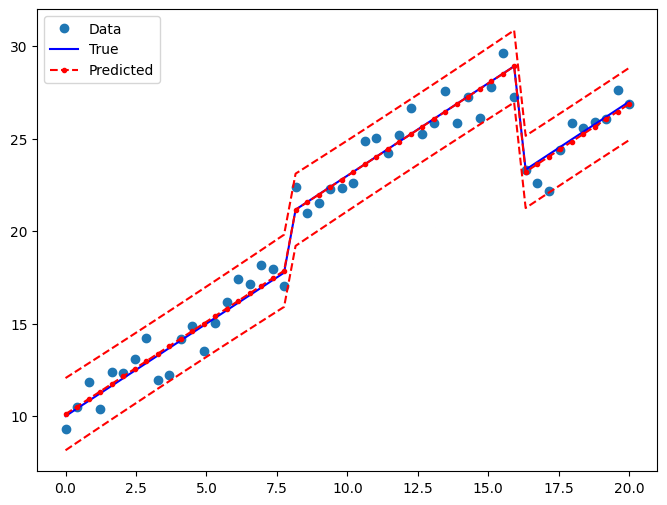

In [15]:
pred_ols2 = res2.get_prediction()
iv_l = pred_ols2.summary_frame()["obs_ci_lower"]
iv_u = pred_ols2.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="Data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res2.fittedvalues, "r--.", label="Predicted")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
legend = ax.legend(loc="best")


## Regression diagnostics

In [16]:
from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Guerry.csv"
dat = pd.read_csv(url)

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols("Lottery ~ Literacy + np.log(Pop1831)", data=dat).fit()

# Inspect the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.90e-08
Time:                        09:47:27   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

### Normality of the residuals

In [17]:
# Jarque-Bera test
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid)
lzip(name, test)


[('Jarque-Bera', 3.3936080248431755),
 ('Chi^2 two-tail prob.', 0.18326831231663288),
 ('Skew', -0.48658034311223436),
 ('Kurtosis', 3.003417757881633)]

In [18]:
# Omni test
name = ["Chi^2", "Two-tail probability"]
test = sms.omni_normtest(results.resid)
lzip(name, test)


[('Chi^2', 3.7134378115971916), ('Two-tail probability', 0.15618424580304743)]

### Influence tests

In [19]:
from statsmodels.stats.outliers_influence import OLSInfluence

test_class = OLSInfluence(results)
test_class.dfbetas[:5, :]


array([[-0.00301154,  0.00290872,  0.00118179],
       [-0.06425662,  0.04043093,  0.06281609],
       [ 0.01554894, -0.03556038, -0.00905336],
       [ 0.17899858,  0.04098207, -0.18062352],
       [ 0.29679073,  0.21249207, -0.3213655 ]])

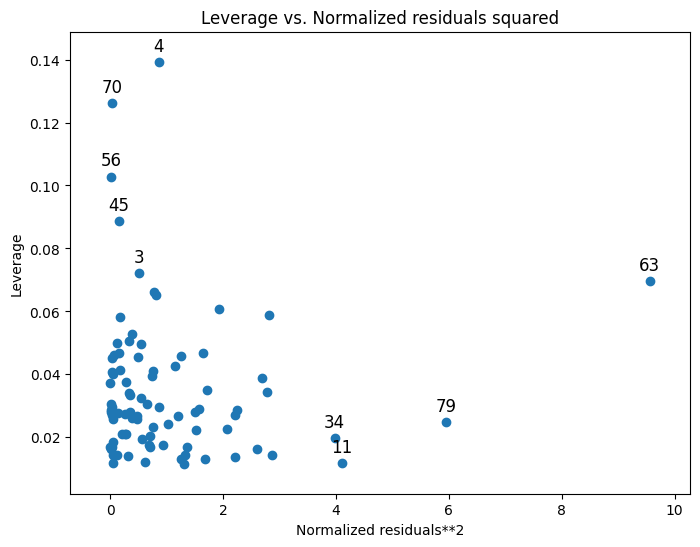

In [20]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(results, ax=ax)


### Multicollinearity

In [21]:
# Condition number
np.linalg.cond(results.model.exog)


702.1792145490067

### Heteroskedasticity tests

In [22]:
# Breush-Pagan test:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)


[('Lagrange multiplier statistic', 4.893213374093957),
 ('p-value', 0.08658690502352209),
 ('f-value', 2.5037159462564387),
 ('f p-value', 0.08794028782672984)]

In [23]:
# Goldfeld-Quandt test
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)


[('F statistic', 1.100242243637814), ('p-value', 0.3820295068692533)]

### Linearity

In [24]:
# Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct:
name = ["t value", "p value"]
test = sms.linear_harvey_collier(results)
lzip(name, test)


[('t value', -1.0796490077759764), ('p value', 0.28346392475692384)]

## Linear Mixed Effects Models

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


In [25]:
%load_ext rpy2.ipython


ModuleNotFoundError: No module named 'rpy2'